**Learning outcomes PW4**

In this section, we will talk about three unsupervised machine learning algorithmes:
Hierarchical Clustering, Kmeans and DBSCAN. We use the rand index metric to evaluate the
performances for each algorithmes and compare them with the random clustering algorithm.
1. Part I: Generate the orignam data with label manually and define the metric function
(rand index).
2. Part II: Clustering the orignal data by Hierarchical Clustering.
3. Part III: Clustering the orignal data by Kmeans.
4. Part IV: Clustering the orignal dayta by DBSCAN.

**Part I: Generate the orignam data with
label manually and define the metric
function (rand index).**

**PW4-Unsupervised machine learning:
Kmeans, Hclustering, DBSCAN**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import cluster
import sklearn as sk
from sklearn import datasets
import pandas as pd

**Exercise 1:** Generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters. You may need the function np.concatenate and the function
np.random.rand()

In [3]:
syn=np.empty([0, 2]);
synLabels=[];
for k in range(4):
  syn = np.concatenate((syn, k*2+np.random.rand(25, 2)), axis=0);
  synLabels = np.concatenate((synLabels, np.ones(25)*k));

print(syn)
print(synLabels)

[[0.66602179 0.02682448]
 [0.43099258 0.64334405]
 [0.75654893 0.81503122]
 [0.7764987  0.02890763]
 [0.74250087 0.75121199]
 [0.59272022 0.91056593]
 [0.1105412  0.17922844]
 [0.96672449 0.72651391]
 [0.54094933 0.49047813]
 [0.95927255 0.41959266]
 [0.26447845 0.88730715]
 [0.5722269  0.87154404]
 [0.98044422 0.69128469]
 [0.72664063 0.75880741]
 [0.03835238 0.43444473]
 [0.07127901 0.18607864]
 [0.61320886 0.75543385]
 [0.40400428 0.20508752]
 [0.68073426 0.81863059]
 [0.05105953 0.44125927]
 [0.92879154 0.8468901 ]
 [0.07360067 0.89789612]
 [0.8129089  0.81554571]
 [0.18032564 0.91322287]
 [0.95725113 0.9625564 ]
 [2.14938281 2.3024217 ]
 [2.36693437 2.77886121]
 [2.649102   2.65949039]
 [2.73858794 2.0539651 ]
 [2.10554089 2.03667416]
 [2.41192011 2.40802005]
 [2.50008924 2.39699627]
 [2.03164264 2.36777367]
 [2.71890271 2.31989498]
 [2.52273514 2.66558829]
 [2.90286991 2.39514064]
 [2.02399909 2.85319109]
 [2.43649369 2.8637002 ]
 [2.34668686 2.05119363]
 [2.30196375 2.96044885]


Display the set with one color per cluster using the scatter function from
matplotlib.pyplot. Here, you may use plt.scatter(X, Y, color)


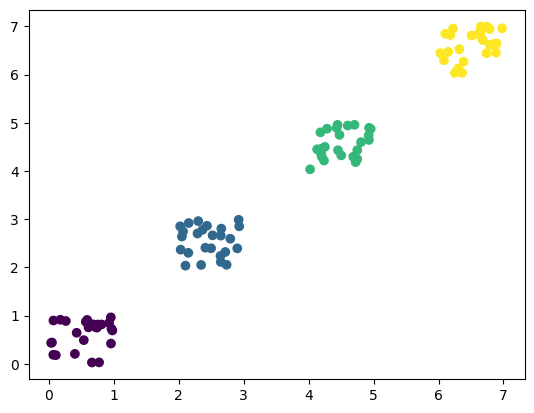

In [4]:
plt.scatter(syn[:, 0], syn[:, 1], c=synLabels);
plt.show();

Cluster this orignal data by the random clustering algorithm as the Baseline.

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to
each point. You may need the function np.random.randint()

In [5]:
def randomClustering(syn, k):
  return np.random.randint(0, k, syn.shape[0])

rand = randomClustering(syn, 4)
rand

array([0, 3, 0, 0, 1, 3, 0, 1, 2, 0, 3, 2, 3, 0, 2, 1, 3, 1, 1, 1, 2, 0,
       1, 3, 1, 3, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 2, 2, 2, 2, 2, 3, 1, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 3, 1, 0, 2, 3, 1, 1, 1, 1, 2, 1, 1,
       0, 2, 3, 3, 1, 1, 3, 3, 0, 3, 0, 3, 3, 2, 0, 2, 1, 3, 3, 1, 3, 2,
       1, 3, 0, 0, 2, 2, 2, 2, 3, 1, 3, 2])

**Exercise 2:** Create the rand index as the metric to evaluate the performance of
clustering.

The Rand index or Rand measure (named after William M. Rand) in statistics, and in
particular in data clustering, is a measure of the similarity between two data clusterings. A
form of the Rand index may be defined that is adjusted for the chance grouping of elements,
this is the adjusted Rand index. The Rand index is the accuracy of determining if a link
belongs within a cluster or not.

Given a set of n elements and two partitions of S to compare,
, a partition of S into r subsets, and , a partition of S into s
subsets, define the following:

a, the number of pairs of elements in S that are in the same subset
in X and in the same subset in Y;

b, the number of pairs of elements in S that are in different
subsets in X and in different subsets in Y;

c, the number of pairs of elements in S that are in the same subset
in X and in different subsets in Y;

d, the number of pairs of elements in S that are in different
subsets in X and in the same subset in Y.

The Rand index, , is:
Intuitively, can be considered as the number of agreements between and and
as the number of disagreements between and .

Since the denominator is the total number of pairs, the Rand index represents the frequency
of occurrence of agreements over the total pairs, or the probability that and will agree
on a randomly chosen pair.

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for
reference)

In [6]:
def rand_index(ref, est):
  num = 0
  if len(ref) != len(est):
    print('arrays must be on the same size')
    return None
  for k in range(len(ref)):
    for l in range(len(ref)-k-1):
      if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k] != ref[k+l+1] and est[k] != est[k+l+1]):
        num += 1
  den = len(ref) * (len(ref) - 1) / 2
  rindex=num/den
  return rindex

Calculate the rand Index for random clustering (the ground truth is given at the first step as
synLabels)

In [7]:
ri = rand_index(rand, rand)
print(ri)
ri = rand_index(synLabels, rand)
print(ri)

1.0
0.6329292929292929


Compute the rand index between the reference clustering and 100 runs of the baseline
algorithm.

In [8]:
ri = np.zeros((100))
for k in range(100):
  ri[k] = rand_index(synLabels, randomClustering(syn, 4))

Display results and compute the mean and standard deviation

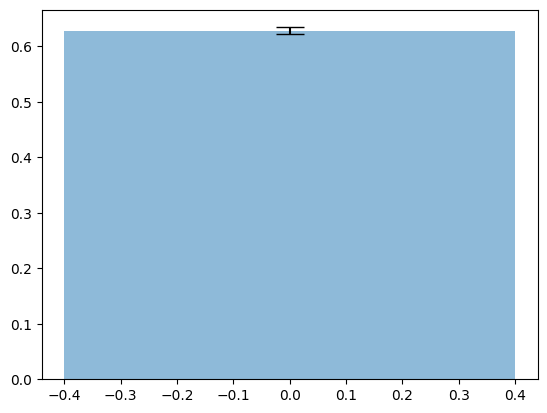

In [9]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

**Part II: Hierarchical Clustering**

**Exercise 3:** Compute the euclidean distance matrix using the pdist function from
scipy.spatial.distance.

In [10]:
import scipy
from scipy.cluster.hierarchy import linkage
euc_distance_matrix = scipy.spatial.distance.pdist(syn)

Display and interpret its shape

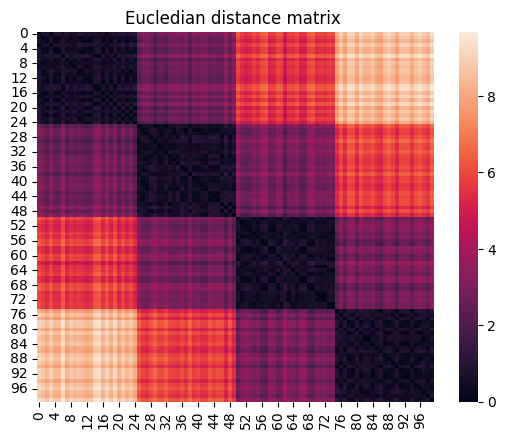

In [11]:
#We compute the squareform with scipy.spatial.distance.squareform
#and plot a heatmap through seaborn
import seaborn as sbn
squareform = scipy.spatial.distance.squareform(euc_distance_matrix)
plt.title("Eucledian distance matrix ")
sbn.heatmap(squareform)
plt.show()

Answer here: We can see that the diagonal is black because the euclidian distance between same number is equal to 0.

Compute the single link hierarchical clustering using the linkage function from
scipy.cluster.hierarchy.

In [12]:
l = sc.cluster.hierarchy.linkage(euc_distance_matrix)


**Exercise 4:** Display the corresponding dendrogram using the dendrogram function
from scipy.cluster.hierarchy

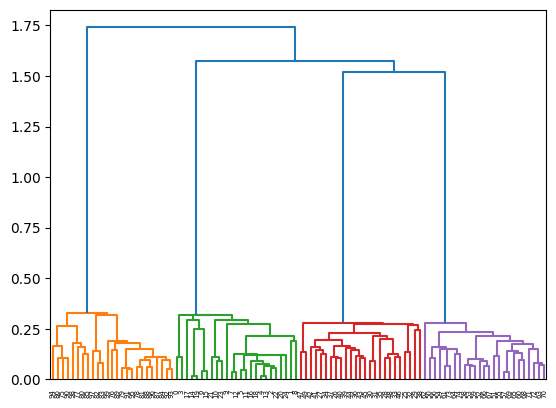

In [13]:
plt.figure()
dn = sc.cluster.hierarchy.dendrogram(l)

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters
using the fcluster function from scipy.cluster.hierarchy.

In [14]:
def agglomerativeClustering(x, k):
  d = sc.spatial.distance.pdist(x)
  l = sc.cluster.hierarchy.linkage(d)
  return sc.cluster.hierarchy.fcluster(l, k, criterion='maxclust')
agg = agglomerativeClustering(syn, 4)

**Exercise 5:** Compute the rand index between the reference clustering and 100 runs of
this clustering algorithm.

In [15]:
ri = np.zeros((100))
for k in range(100):
  ri[k] = rand_index(synLabels, agglomerativeClustering(syn, 4))

Display results and compute the mean and variance.

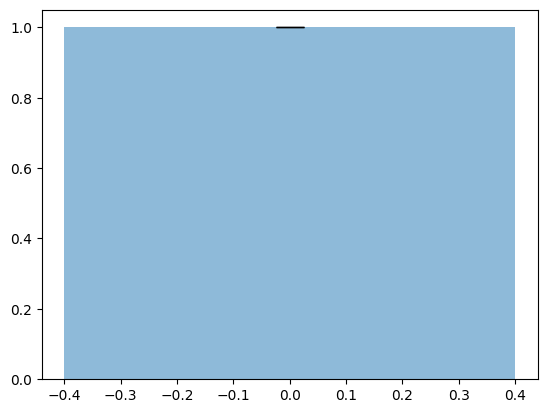

In [16]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

Explain why the standard deviation is 0.
The standard deviation is equal to 0 beacause all values are equal.

The algorithm is deterministic.


**Part III: Partitional Clustering - Kmeans**

**Exercise 6:** Implement the k-means algorithm (see https://en.wikipedia.org/wiki/Kmeans_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance
of the points to the centroids.

In [17]:
def kMeans(dataset, k, nbIterations=100, show=False):
    centroids = np.random.random((k, dataset.shape[1])) * np.max(dataset)
    labels = np.zeros((dataset.shape[0]))

    for i in range(nbIterations):
        pastLabels = labels.copy()
        cd = scipy.spatial.distance.cdist(dataset, centroids)
        labels = np.argmin(cd, axis=1)

        if show:
            plt.scatter(dataset[:, 0], dataset[:, 1], c=labels)
            plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', alpha=0.5)
            plt.show()

        for c in range(k):
            if np.sum(labels == c) == 0:
                centroids[c, :] = np.random.random(dataset.shape[1]) * np.max(dataset, axis=0)
            else:
                centroids[c, :] = np.mean(dataset[labels == c, :], axis=0)

        if np.all(pastLabels == labels):
            print("Convergence atteinte à l'itération", i)
            break

    for c in range(k):
        if np.sum(labels == c) == 0:
            print(f"Cluster vide détecté: {c}")

    return labels

**Exercise 7**: Compute the rand index between the reference clustering and 100 runs of
this clustering algorithm.

In [18]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, kMeans(syn, 4))

Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 2
Cluster vide détecté: 3
Convergence atteinte à l'itération 2
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 1
Cluster vide détecté: 0
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 1
Cluster vide détecté: 3
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 2
Con

Display results and compute the mean and variance.

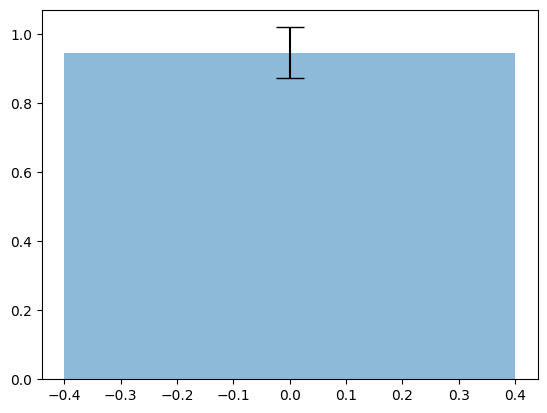

In [20]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

**Part IV: DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering
algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.
It is a density-based clustering non-parametric algorithm: given a set of points in some
space, it groups together points that are closely packed together (points with many nearby
neighbors), marking as outliers points that lie alone in low-density regions (whose nearest
neighbors are too far away). DBSCAN have two parameters important: eps and min_sample.
Unlike Kmeans, we don't have to specify the number of clusters before clustering.

**Exercise 8:** Clustering the data syn by DBSCAN

Here, you can use directily sklearn.cluster.DBSCAN(eps=0.5, min_samples=5,
metric='euclidean')

In [21]:
from sklearn.cluster import DBSCAN
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)

After clustering, give us the labels for each observation.

In [22]:
clustering_DBSCAN.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Compute the rand index between the reference clustering and 100 runs of this DBSCAN
clustering algorithm.

In [23]:
ri = np.zeros((100))
for k in range(100):
  clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)
  ri[k] = rand_index(synLabels, clustering_DBSCAN.labels_)

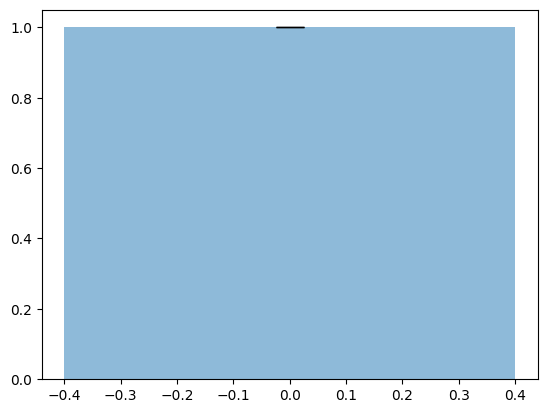

In [24]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

**Exercise 9:** Performance Analysis

Display the performance of the 4 clustering algorithms (Random, Hierarchical Clustering,
Kmeans and DBSCAN) on the synthetic dataset using the bar function from
matplotlib.pyplot.

Convergence atteinte à l'itération 3
Cluster vide détecté: 0
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 3
Cluster vide détecté: 1
Convergence atteinte à l'itération 2
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 1
Cluster vide détecté: 3
Convergence atteinte à l'itération 1
Cluster vide détecté: 3
Convergence atteinte à l'itération 3
Cluster vide détecté: 1
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 2
Cluster vide détecté: 0
Convergence atteinte à l'itération 2
Cluster vide détecté: 1
Convergence atteinte à l'itération 3
Cluster vide déte

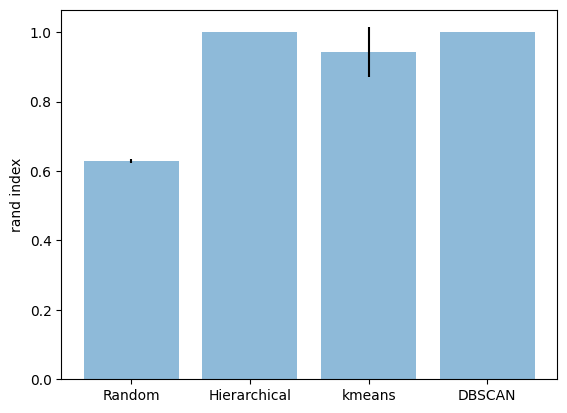

In [25]:
ri = np.zeros((4, 100))
for k in range(100):
  ri[0, k] = rand_index(synLabels, randomClustering(syn, 4))
  ri[1, k] = rand_index(synLabels, agglomerativeClustering(syn, 4))
  ri[2, k] = rand_index(synLabels, kMeans(syn, 4))
  ri[3, k] = rand_index(synLabels, DBSCAN(eps=0.5, min_samples=5).fit(syn).labels_)

x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr=np.std(ri, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

**Exercice 10:** Load the iris dataset using the sklearn.datasets.load_iris function from scikit-learn and perform the same performance analysis using this dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal
and sepal length, stored in a 150x4 numpy.ndarray. This dataset have reference label in the
'target' column. The 3 features are included inside the 'data'.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length
and Petal Width

Convergence atteinte à l'itération 14
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Cluster vide détecté: 2
Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 5
Cluster vide détecté: 0
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 13
Convergence atteinte à l'itération 1
Cluster vide détecté: 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Cluster vide détecté: 2
Convergence atteinte à l'itération 3
Cluster vide détecté: 1
Convergence atteinte à l'itération 14
Convergence atteinte à l'itération 12
Convergence atteinte à l'itération 8
Convergence atteinte à l'itération 9
Convergence atteinte à l'itération 13
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Cluster vide détecté: 2
Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 5
Cluster vide détecté: 2
Convergence atteinte à l'itération 8
Convergence atteinte à l'itération 8
Convergence atteinte à l'i

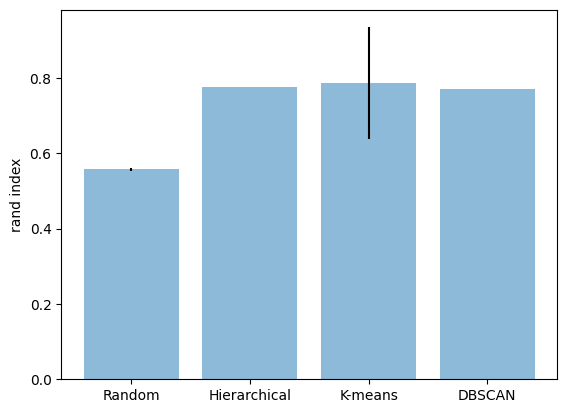

In [30]:
from sklearn.datasets import load_iris

#charger le jeu de donner iris
iris = load_iris()
data = iris.data
target = iris.target

# Initialiser un tableau pour stocker les valeurs de l'indice de Rand pour différentes méthodes de regroupement
ri = np.zeros((4, 100))
for k in range(100):
  ri[0, k] = rand_index(target, randomClustering(data, 3))
  ri[1, k] = rand_index(target, agglomerativeClustering(data, 3))
  ri[2, k] = rand_index(target, kMeans(data, 3))
  ri[3, k] = rand_index(target, DBSCAN(eps=0.5, min_samples=5).fit(data).labels_)

# Tracer les résultats
x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr=np.std(ri, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'K-means', 'DBSCAN'])
plt.show()



K-means is the best method to reach the goal in this case

**Exercice 11:** Load the Breast cancer wisconsin (diagnostic) dataset

Use the sklearn.datasets.load_breast_cancer function from scikit-learn and perform the same
performance analysis using this dataset.

The breast cancer dataset is a classic and very easy binary classification dataset. The features
are stored in 'data'. And the reference are stored in the 'target' .

Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 8
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 9
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 7
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 7
Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 0
Cluster vide détecté: 1
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 11
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 10
Convergence atteinte à l'itération 0
Cluster vide détect

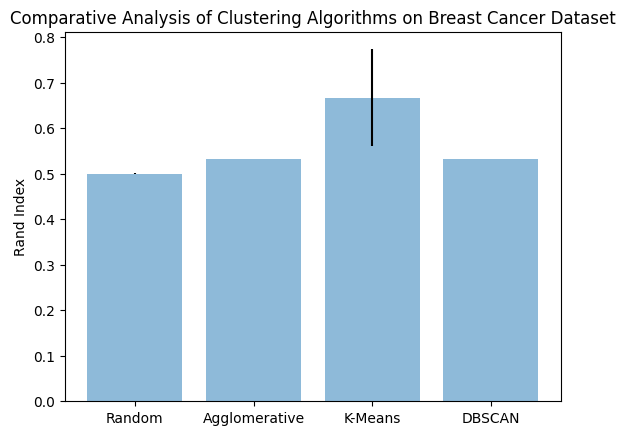

In [29]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target

plt.show()
ri_all = np.zeros((4, 100))
for k in range(100):
    ri_all[0, k] = rand_index(target, randomClustering(data, 2))
    ri_all[1, k] = rand_index(target, agglomerativeClustering(data, 2))
    ri_all[2, k] = rand_index(target, kMeans(data, 2))
    ri_all[3, k] = rand_index(target, DBSCAN(eps=0.5, min_samples=5).fit(data).labels_)

x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri_all, axis=1), yerr=np.std(ri_all, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('Rand Index')
plt.xticks(x, ['Random', 'Agglomerative', 'K-Means', 'DBSCAN'])
plt.title('Comparative Analysis of Clustering Algorithms on Breast Cancer Dataset')
plt.show()

K-means is again the best method for this dataset

##Explication du code:

*  On importe la fonction load_iris de scikit-learn pour charger le jeu de données Iris.

*  On récupère les données et les étiquettes du jeu de données.


*   On initialise un tableau (ri) pour stocker les valeurs de l'indice de Rand. Il a une taille de 4x100 pour stocker les résultats de quatre méthodes de regroupement sur 100 itérations.

*   On effectue le regroupement 100 fois en utilisant différentes méthodes, et on stocke les résultats dans le tableau ri.
Chaque méthode de clustering a une approche différente pour regrouper des données. Voici une explication brève de ce que font exactement les méthodes utilisées:

1. **Random Clustering (`randomClustering`) :**
   - **Objectif :** Assigner des points de données à des clusters de manière aléatoire.
   - **Comment :** Affecte chaque point à l'un des clusters de manière aléatoire.

2. **Agglomerative Clustering (`agglomerativeClustering`) :**
   - **Objectif :** Construire une hiérarchie de clusters en fusionnant progressivement des clusters similaires.
   - **Comment :** Commence par traiter chaque point comme un cluster séparé, puis fusionne récursivement les clusters les plus similaires jusqu'à obtenir un seul cluster.

3. **K-Means Clustering (`kMeans`) :**
   - **Objectif :** Partitionner les données en k clusters, où k est prédéfini.
   - **Comment :** Initialise k centres de cluster de manière aléatoire, attribue chaque point au cluster du centre le plus proche, puis met à jour les centres en calculant la moyenne des points dans chaque cluster. Répète ces étapes jusqu'à convergence.

4. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) :**
   - **Objectif :** Identifier des clusters basés sur la densité des points dans l'espace.
   - **Comment :** Définit un point central dans un cluster si au moins un nombre minimum de points sont à une certaine distance de ce point. Ensuite, élargit le cluster en ajoutant des points qui sont également à une certaine distance du point central. Les points isolés peuvent être considérés comme du bruit.

Chacune de ces méthodes a ses avantages et inconvénients, et leur efficacité peut dépendre de la nature des données. Le choix de la méthode de clustering dépend souvent de la structure des données et des objectifs spécifiques de l'analyse.

*   On utilise la bibliothèque Matplotlib pour tracer un graphique à barres montrant la moyenne et l'écart type des indices de Rand pour chaque méthode de regroupement. Les méthodes sont affichées sur l'axe des x.

L'objectif de ces codes est d'évaluer la performance de différentes méthodes de regroupement (aléatoire, hiérarchique, K-Means, DBSCAN) sur un jeu de données en utilisant l'indice de Rand. L'indice de Rand mesure la similarité entre les regroupements obtenus par les différentes méthodes et les étiquettes réelles du jeu de données.

Les nombres que l'on peut voir dans les parenthèses, comme agglomerativeClustering(data, 3) ou kMeans(data, 3), représentent le nombre de clusters que l'on souhaite obtenir à partir de l'algorithme de clustering.

Dans l'exercice 9, on travaille avec un jeu de données synthétique (syn) où on génère 4 groupes distincts. Ainsi, le nombre de clusters (k) était défini à 4 lors de l'appel de nos fonctions de clustering (randomClustering(syn, 4), agglomerativeClustering(syn, 4), kMeans(syn, 4)).

Dans les exercices 10 et 11, on travaille avec des ensembles de données réels (Iris et Breast Cancer) qui ont déjà des étiquettes de classe définies (3 classes pour Iris, 2 classes pour le cancer du sein). Donc on utilise le nombre réel de classes dans ces ensembles de données comme argument pour le nombre de clusters.
Comparons les performances des méthodes de clustering pour les trois jeux de données en utilisant les indices de Rand moyens obtenus sur plusieurs itérations (100 itérations dans votre code). Les indices de Rand vont de 0 (aucune correspondance) à 1 (correspondance parfaite).

### Interprétation graphique :

1. **Random Clustering :**
   - Les performances sont assez similaires pour les trois ensembles de données. Les indices de Rand sont tous dans la plage de 0.5 à 0.6, indiquant une correspondance modérée avec les vrais clusters.

2. **Agglomerative Clustering :**
   - La méthode agglomérative fonctionne bien sur les données synthétiques (`syn`) mais montre une ambiguïté sur les ensembles de données réels (`data` et `features`), avec des indices de Rand inférieurs à 1.

3. **K-Means Clustering :**
   - Le K-Means a des performances élevées sur les données synthétiques et l'Iris dataset, mais montre une ambiguïté sur le Breast Cancer dataset.

4. **DBSCAN :**
   - DBSCAN fonctionne bien sur les données synthétiques et l'Iris dataset, mais montre une ambiguïté sur le Breast Cancer dataset.

**Remarques générales :**
- Les données synthétiques ont été générées spécifiquement pour certaines méthodes, ce qui explique leurs performances exceptionnelles.
- Les ensembles de données réels, en particulier le Breast Cancer dataset, présentent des complexités qui peuvent affecter la performance des méthodes de clustering.
- Les indices de Rand indiquent une correspondance partielle avec les vrais clusters pour la plupart des méthodes et des ensembles de données. Cela peut être dû à la nature des données réelles et à la difficulté de les regrouper parfaitement.
